# **Introduction**

The data I am using contains annual mean temperatures for counties in the US Lower 48 states, from 1895 to 2019. I am interested in understanding if the South and Southeast regions are warming up evenly and if the South, which leads the country in having more billion-dollar weather disaster events, has been warming up these past two decades. This will provide additional information to the public and policymakers about the extent of climate change in those two nearby regions which share the same latitudes, diverse topography and proximity to large bodies of water, and support the need to take mitigating steps urgently to meet the Paris 2015 goals of keeping the Earth's average temperatures below 2-degree C. It is worth noting that the Earth has already warmed up by an average of 1-degree C last century.

I will focus on one hand on comparing the differences in average annual temperatures between the South and Southeast over the past 125 years, to quantify any potential changes; on the other hand I will compare the differences in mean annual temperatures in the South for the first two decades of this century, to quantify any change in temperatures so early in the century.



# **Hypothesis 1**

Ho: There are no differences in average annual temperatures in the US South region versus those of the US Southeast region between 1895 and 2019.

Ha: There are differences in average annual temperatures in the US South region versus those of the US Southeast region between 1895 and 2019.


# **Hypothesis 2**

Ho: There are no differences in average annual temperatures in the US South for the first decade of this century 2000-2009 versus those of the following one 2010-2019.

Ha: There are differences in average annual temperatures in the US South for the first decade of this century 2000-2009 versus those of the following one 2010-2019.

# **Data**

The data comes from The Washington Post GitHub page (https://github.com/washingtonpost/data-2C-beyond-the-limit-usa/blob/main/data/processed/climdiv_county_year.csv), which I edited to include one more variable, the state's names. This final dataset used for this analysis is located at https://drive.google.com/file/d/19fY-I--dcGFKdwNHaJl4YccMo53NZqmh/view?usp=sharing. It contains 388375 entries and 5 variables. There are no missing values.

In [ ]:
# Set up environment

%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math
from scipy import stats


In [ ]:
# The 3 cells below load the dataset from Google Drive

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link = "https://drive.google.com/file/d/19fY-I--dcGFKdwNHaJl4YccMo53NZqmh/view?usp=sharing"
id1 = link.split("/")[-2] 
print (id1) 

19fY-I--dcGFKdwNHaJl4YccMo53NZqmh


In [ ]:
downloaded = drive.CreateFile({'id':id1}) 
downloaded.GetContentFile('climdiv_county_year_statename.csv')  
temp_county_year_stname = pd.read_csv('climdiv_county_year_statename.csv')

In [ ]:
# Information on data

print(temp_county_year_stname.shape)

temp_county_year_stname.info()
temp_county_year_stname.head(-10)

(388375, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388375 entries, 0 to 388374
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   fips       388375 non-null  int64  
 1   year       388375 non-null  int64  
 2   statename  388375 non-null  object 
 3   temp       388375 non-null  float64
 4   tempc      388375 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 14.8+ MB


,fips,year,statename,temp,tempc
0,1001,1895,Alabama,62.633333,17.018519
1,1001,1896,Alabama,65.341667,18.523148
2,1001,1897,Alabama,65.150000,18.416667
3,1001,1898,Alabama,63.816667,17.675926
4,1001,1899,Alabama,63.925000,17.736111
...,...,...,...,...,...
388360,56045,2005,Wyoming,46.083333,7.824074
388361,56045,2006,Wyoming,46.758333,8.199074
388362,56045,2007,Wyoming,46.241667,7.912037
388363,56045,2008,Wyoming,43.125000,6.180556


In [ ]:
temp_county_year_stname.describe()

,fips,year,temp,tempc
count,388375.000000,388375.000000,388375.000000,388375.000000
mean,30665.073383,1957.000000,53.995737,12.219854
std,14979.044369,36.083284,8.431610,4.684228
min,1001.000000,1895.000000,30.508333,-0.828704
25%,19043.000000,1926.000000,47.650000,8.694444
50%,29211.000000,1957.000000,53.908333,12.171296
75%,46007.000000,1988.000000,60.533333,15.851852
max,56045.000000,2019.000000,78.816667,26.009259


In [ ]:
# Climate Regions in the US Lower 48 (9 regions)
west_north_central = ['Montana', 'Nebraska', 'North Dakota', 'South Dakota', 'Wyoming']
northeast = ['Connecticut', 'Delaware', 'Maine', 'Maryland', 'Massachusetts', 'New Hampshire', 'New Jersey', 'New York', 'Pennsylvania', 'Rhode Island', 'Vermont']
south = ['Arkansas', 'Kansas', 'Louisiana', 'Mississippi', 'Oklahoma', 'Texas']
southeast = ['Alabama', 'Florida', 'Georgia', 'North Carolina', 'South Carolina', 'Virginia']
central = ['Illinois', 'Indiana', 'Kentucky', 'Missouri', 'Ohio', 'Tennessee', 'West Virginia']
east_north_central = ['Iowa', 'Michigan', 'Minnesota', 'Wisconsin']
northwest = ['Idaho', 'Oregon', 'Washington']
southwest = ['Arizona', 'Colorado', 'New Mexico', 'Utah']
west = ['California', 'Nevada']

list_region = [west_north_central, northeast, south, southeast, central, east_north_central, northwest, southwest, west]
list_region_str = ['west_north_central', 'northeast', 'south', 'southeast', 'central', 'east_north_central', 'northwest', 'southwest', 'west']


In [ ]:
# Copy the original dataframe to a new one. 
# In the new dataframe, create 2 new categorical variables 'region' and 'decade' to put each state in its corresponding climate region and each year in its decade.
temp_county_year = temp_county_year_stname.copy()

print(len(temp_county_year.statename.values))
print(type(temp_county_year.statename))
print(type(temp_county_year.statename.values))
print(temp_county_year.statename.values) # array
print(temp_county_year.statename.values[-1])

temp_county_year['region'] = ''
temp_county_year['decade'] = ''

temp_county_year


388375
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
['Alabama' 'Alabama' 'Alabama' ... 'Wyoming' 'Wyoming' 'Wyoming']
Wyoming


,fips,year,statename,temp,tempc,region,decade
0,1001,1895,Alabama,62.633333,17.018519,,
1,1001,1896,Alabama,65.341667,18.523148,,
2,1001,1897,Alabama,65.150000,18.416667,,
3,1001,1898,Alabama,63.816667,17.675926,,
4,1001,1899,Alabama,63.925000,17.736111,,
...,...,...,...,...,...,...,...
388370,56045,2015,Wyoming,46.633333,8.129630,,
388371,56045,2016,Wyoming,47.250000,8.472222,,
388372,56045,2017,Wyoming,45.650000,7.583333,,
388373,56045,2018,Wyoming,43.725000,6.513889,,


In [ ]:
# Assigning values to column 'region'.
%%time
for i in range(len(temp_county_year.statename.values)):
  for k in range(len(list_region)):
    if (temp_county_year.statename.values[i] in list_region[k]):
      temp_county_year.region.values[i] = list_region_str[k]



CPU times: user 22.9 s, sys: 13.5 ms, total: 22.9 s
Wall time: 23 s


In [ ]:
temp_county_year.head(-10)

,fips,year,statename,temp,tempc,region,decade
0,1001,1895,Alabama,62.633333,17.018519,southeast,
1,1001,1896,Alabama,65.341667,18.523148,southeast,
2,1001,1897,Alabama,65.150000,18.416667,southeast,
3,1001,1898,Alabama,63.816667,17.675926,southeast,
4,1001,1899,Alabama,63.925000,17.736111,southeast,
...,...,...,...,...,...,...,...
388360,56045,2005,Wyoming,46.083333,7.824074,west_north_central,
388361,56045,2006,Wyoming,46.758333,8.199074,west_north_central,
388362,56045,2007,Wyoming,46.241667,7.912037,west_north_central,
388363,56045,2008,Wyoming,43.125000,6.180556,west_north_central,


In [ ]:
# Decades (13 decades)
decade_1890_1899 = list(range(1890, 1900, 1))
decade_1900_1909 = list(range(1900, 1910, 1))
decade_1910_1919 = list(range(1910, 1920, 1))
decade_1920_1929 = list(range(1920, 1930, 1))
decade_1930_1939 = list(range(1930, 1940, 1))
decade_1940_1949 = list(range(1940, 1950, 1))
decade_1950_1959 = list(range(1950, 1960, 1))
decade_1960_1969 = list(range(1960, 1970, 1))
decade_1970_1979 = list(range(1970, 1980, 1))
decade_1980_1989 = list(range(1980, 1990, 1))
decade_1990_1999 = list(range(1990, 2000, 1))
decade_2000_2009 = list(range(2000, 2010, 1))
decade_2010_2019 = list(range(2010, 2020, 1))
decade_2000_2019 = list(range(2000, 2020, 1))

list_decade = [decade_1890_1899, decade_1900_1909, decade_1910_1919, decade_1920_1929, decade_1930_1939, decade_1940_1949, decade_1950_1959, decade_1960_1969, decade_1970_1979, decade_1980_1989, decade_1990_1999, decade_2000_2009, decade_2010_2019]
list_decade_str = ['decade_1890_1899', 'decade_1900_1909', 'decade_1910_1919', 'decade_1920_1929', 'decade_1930_1939', 'decade_1940_1949', 'decade_1950_1959', 'decade_1960_1969', 'decade_1970_1979', 'decade_1980_1989', 'decade_1990_1999', 'decade_2000_2009', 'decade_2010_2019']



In [ ]:
# Assigning values to column 'decade'.
%%time
for i in range(len(temp_county_year.year.values)):
  for k in range(len(list_decade)):
    if (temp_county_year.year.values[i] in list_decade[k]):
      temp_county_year.decade.values[i] = list_decade_str[k]



CPU times: user 41.3 s, sys: 10.7 ms, total: 41.3 s
Wall time: 41.4 s


In [ ]:
temp_county_year.head(-10)


,fips,year,statename,temp,tempc,region,decade
0,1001,1895,Alabama,62.633333,17.018519,southeast,decade_1890_1899
1,1001,1896,Alabama,65.341667,18.523148,southeast,decade_1890_1899
2,1001,1897,Alabama,65.150000,18.416667,southeast,decade_1890_1899
3,1001,1898,Alabama,63.816667,17.675926,southeast,decade_1890_1899
4,1001,1899,Alabama,63.925000,17.736111,southeast,decade_1890_1899
...,...,...,...,...,...,...,...
388360,56045,2005,Wyoming,46.083333,7.824074,west_north_central,decade_2000_2009
388361,56045,2006,Wyoming,46.758333,8.199074,west_north_central,decade_2000_2009
388362,56045,2007,Wyoming,46.241667,7.912037,west_north_central,decade_2000_2009
388363,56045,2008,Wyoming,43.125000,6.180556,west_north_central,decade_2000_2009


# **Methods**


## Hypothesis 1

For this case study, I will create two DataFrames, one containing annual mean temperatures in the South and another for annual mean temperatures in the Southeast, between 1895 and 2019. The temperatures are in degrees Celsius (C) and Fahrenheit (F), I will use degrees C for this study. The South includes the following states: Arkansas, Kansas, Louisiana, Mississippi, Oklahoma, Texas. The Southeast includes Alabama, Florida, Georgia, North Carolina, South Carolina, Virginia.

I choose to look at annual temperatures between those two regions because they share similar latitudes, diverse topogragraphy and access to large bodies of water. It thus makes sense to investigate if their annual temperatures are on average similar and thus if they are warming up evenly. Both data groups are independent given that they are recorded at different locations.

I will look at the distributions of both groups of data to check if they are close to normal using their histogram, skewness and kurtosis. I will perform an independent samples t-test between the groups at the two-tail, 95% confidence interval. I will choose 0.05 as the threshold for statistical significance and compare the p-value to it, and decide to reject or not the null hypothesis.


In [ ]:
# Let's split our dataset

# Number of unique regions (9)
print(temp_county_year['region'].unique())

# Pick the 2 regions of interest South and Southeast and create their DataFrame
filter_list_region = ['south', 'southeast']
temp_county_year_south_southeast = temp_county_year[temp_county_year['region'].isin(filter_list_region)]
# temp_county_year_south_southeast = df_region[df_region['region'].isin(filter_list_region)]

print(temp_county_year_south_southeast['region'].unique())
print(len(temp_county_year_south_southeast['region']))
print()
print(temp_county_year_south_southeast['statename'].unique())



['southeast' 'southwest' 'south' 'west' 'northeast' 'northwest' 'central'
 'east_north_central' 'west_north_central']
['southeast' 'south']
153500

['Alabama' 'Arkansas' 'Florida' 'Georgia' 'Kansas' 'Louisiana'
 'Mississippi' 'North Carolina' 'Oklahoma' 'South Carolina' 'Texas'
 'Virginia']


In [ ]:
temp_county_year_south_southeast.head(-10)


,fips,year,statename,temp,tempc,region,decade
0,1001,1895,Alabama,62.633333,17.018519,southeast,decade_1890_1899
1,1001,1896,Alabama,65.341667,18.523148,southeast,decade_1890_1899
2,1001,1897,Alabama,65.150000,18.416667,southeast,decade_1890_1899
3,1001,1898,Alabama,63.816667,17.675926,southeast,decade_1890_1899
4,1001,1899,Alabama,63.925000,17.736111,southeast,decade_1890_1899
...,...,...,...,...,...,...,...
364735,51840,2005,Virginia,53.883333,12.157407,southeast,decade_2000_2009
364736,51840,2006,Virginia,55.041667,12.800926,southeast,decade_2000_2009
364737,51840,2007,Virginia,54.308333,12.393519,southeast,decade_2000_2009
364738,51840,2008,Virginia,53.083333,11.712963,southeast,decade_2000_2009


In [ ]:
# Plot of all the annual temperatures in the South and Southeast from 1895 to 2019

# Mean temperatures grouped by region and year
temp_cty_year_south_southeast_mean = temp_county_year_south_southeast.groupby(['region','year']).mean()

print(len(temp_cty_year_south_southeast_mean))
print(temp_cty_year_south_southeast_mean)

# Mean temperatures per year for each region (south-southeast)
mean_tempc_south = temp_cty_year_south_southeast_mean.loc['south'].tempc
mean_tempc_southeast= temp_cty_year_south_southeast_mean.loc['southeast'].tempc

print(len(mean_tempc_south))
print(len(mean_tempc_southeast))
print()
print(mean_tempc_south) # Series
print(mean_tempc_southeast)


250
                        fips       temp      tempc
region    year                                    
south     1895  32798.957382  60.056164  15.586758
          1896  32798.957382  62.709614  17.060897
          1897  32798.957382  62.204947  16.780526
          1898  32798.957382  61.275000  16.263889
          1899  32798.957382  61.267402  16.259668
...                      ...        ...        ...
southeast 2015  27182.600701  63.046891  17.248273
          2016  27182.600701  63.398001  17.443334
          2017  27182.600701  63.491798  17.495443
          2018  27182.600701  62.822081  17.123378
          2019  27182.600701  63.763339  17.646300

[250 rows x 3 columns]
125
125

year
1895    15.586758
1896    17.060897
1897    16.780526
1898    16.263889
1899    16.259668
          ...    
2015    17.432465
2016    18.077689
2017    17.977430
2018    17.201491
2019    17.105333
Name: tempc, Length: 125, dtype: float64
year
1895    15.325509
1896    16.555596
1897    16.4801

In [ ]:
# Descriptive statistics
print(temp_cty_year_south_southeast_mean.loc['south'].tempc.describe())
print('\n')
print(temp_cty_year_south_southeast_mean.loc['southeast'].tempc.describe())




count    125.000000
mean      16.734552
std        0.581572
min       15.539250
25%       16.317676
50%       16.690301
75%       17.030047
max       18.386775
Name: tempc, dtype: float64


count    125.000000
mean      16.237708
std        0.565535
min       15.126119
25%       15.867622
50%       16.202771
75%       16.548267
max       17.646300
Name: tempc, dtype: float64


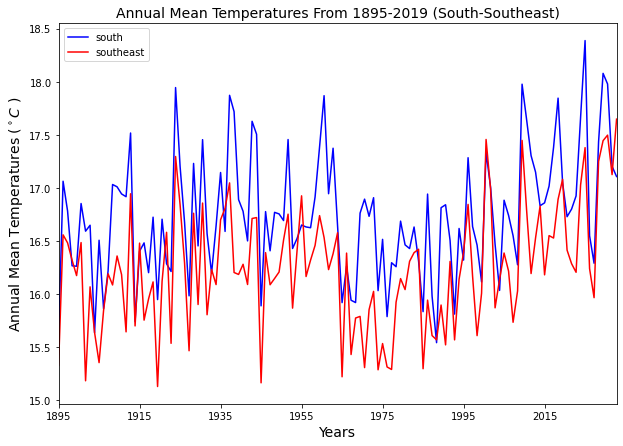

In [ ]:
# Plot of temperatures in the South and Southeast from 1895 to 2019 (125 years)
plt.figure(figsize=(10,7)) 

plt.plot(np.arange(len(mean_tempc_south)),mean_tempc_south, '-b', label= "south")
plt.plot(np.arange(len(mean_tempc_south)),mean_tempc_southeast, '-r', label= "southeast")    
plt.xlabel('Years',size=14) 
plt.ylabel('Annual Mean Temperatures ($^\circ C$ )',size=14) 
plt.xticks(np.arange(0,125,18), ['1895', '1915','1935','1955','1975','1995','2015'])
plt.autoscale(enable= True, axis= 'x', tight= True)
# plt.xlim(0,19)
# g.set(xlim=(0, 60), ylim=(0, 12), xticks=[10, 30, 50], yticks=[2, 6, 10])
plt.title('Annual Mean Temperatures From 1895-2019 (South-Southeast)',size=14) 
plt.legend(loc=0) 
plt.show()

# Use plt.autoscale to use limits on x-axis and y-axis of plots, with tight=True


DescribeResult(nobs=82125, minmax=(8.509259259259258, 25.194444444444446), mean=16.734552342296634, variance=7.584771383665546, skewness=-0.25192232166684153, kurtosis=-0.38805889594178744)
DescribeResult(nobs=71375, minmax=(7.768518518518518, 26.009259259259252), mean=16.23770824414607, variance=8.466956656453407, skewness=0.08137212751155708, kurtosis=-0.19206362085107775)


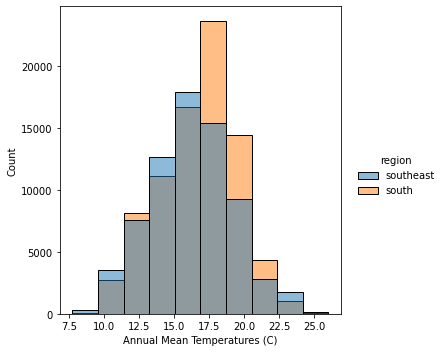

In [ ]:
# Check for normality of the distribution of annual temperatures
# Histogram of annual temperatures in the South and Southeast
# sns.set_theme(style="ticks")
ax = sns.displot(temp_county_year_south_southeast, x= 'tempc', hue= 'region', 
                 facet_kws=dict(despine=False), bins = 10)  # stat= 'probability', 
ax.set_axis_labels("Annual Mean Temperatures (C)", "Count"); # Add ';' at the last row to avoid printing the object.


# Descriptive statistics
# print(stats.describe(temp_county_year_south_southeast.loc['south'].tempc)) # Cannot work because I didn't group here by region using the groupby method.
print(stats.describe(temp_county_year_south_southeast[temp_county_year_south_southeast['region'] == 'south'].tempc))
print(stats.describe(temp_county_year_south_southeast[temp_county_year_south_southeast['region'] == 'southeast'].tempc))


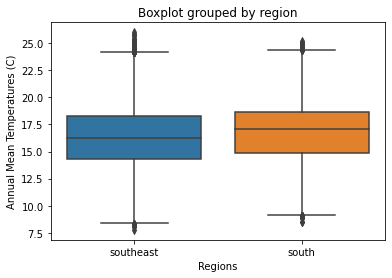

In [ ]:
# Plot boxplot of annual temperatures in the South and Southeast
bx = sns.boxplot(x= 'region', y='tempc', data= temp_county_year_south_southeast)#, linewidth=2.5) 
bx.set_xlabel("Regions")  
bx.set_ylabel("Annual Mean Temperatures (C)")
bx.set_title("Boxplot grouped by region"); 
# bx.xaxis.set_major_locator(ticker.MultipleLocator())
# bx.xaxis.set_major_formatter(ticker.ScalarFormatter())

# How to get boxplot data from Matplotlib boxplots? https://stackoverflow.com/questions/33518472/how-to-get-boxplot-data-for-matplotlib-boxplots

In [ ]:
# Perform t-test
stats.ttest_ind(temp_county_year_south_southeast[temp_county_year_south_southeast['region'] == 'south'].tempc,
                temp_county_year_south_southeast[temp_county_year_south_southeast['region'] == 'southeast'].tempc)


Ttest_indResult(statistic=34.33746288592767, pvalue=2.069459169539864e-257)

In [ ]:
# 95% confidence interval

def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return ("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" degrees C and "+str(ci_upper)+" degrees C.")

print(get_95_ci(temp_county_year_south_southeast.loc[temp_county_year_south_southeast['region'] == 'southeast'].tempc,
                temp_county_year_south_southeast.loc[temp_county_year_south_southeast['region'] == 'south'].tempc))

# Average annual temperatures in each of the Southeast and South, from 1895 to 2019.
print(temp_county_year_south_southeast.loc[temp_county_year_south_southeast['region'] == 'southeast'].tempc.mean(),
      temp_county_year_south_southeast.loc[temp_county_year_south_southeast['region'] == 'south'].tempc.mean())



The difference in means at the 95% confidence interval (two-tail) is between 0.4683746148865769 degrees C and 0.5253135814148433 degrees C.
16.237708244145956 16.734552342296666


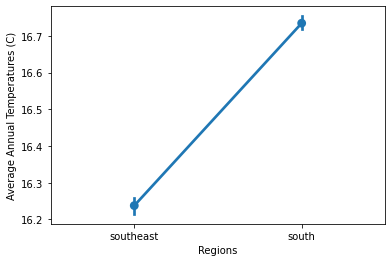

In [ ]:
# Visualize difference in means of annual temperatures between the south and southeast regions
# ax = sns.pointplot(x= 'year', y= 'tempc', hue= 'region', data= temp_county_year_south_southeast)
# ax = sns.pointplot(x= 'region', y= 'tempc', hue= 'region', data= temp_county_year_south_southeast)
# sns.set_theme(style="darkgrid")
ax = sns.pointplot(x= 'region', y= 'tempc', data= temp_county_year_south_southeast)
ax.set_xlabel("Regions")
ax.set_ylabel("Average Annual Temperatures (C)");


# **Results**

Based on the histogram, annual temperatures in the South and Southeast are close enough to a normal distribution, which is also suppported by skewness and kurtosis. I therefore performed a t-test and obtained a p-value very close to 0 and less than the target 0.05. Based on this, I can say there is low probability that our results are purely due to random variations in observed temperatures. I can therefore reject the null and say that there is a statistically significant difference in average annual temperatures between the South and Southeast from 1895 and 2019.

The 95% confidence interval suggests that the difference in the average annual mean temperatures between the South and the Southeast for the period 1895-2019 is between 0.47 degrees C and 0.52 degrees C. The average annual temperatures in each of those regions is 16.24 degrees C in the Southeast and 16.73 degrees C in the South.

# **Discussion and Recommendation**

The average annual temperatures are higher in the South compared to the Southeast by about 0.5 degree C (with a range between 0.47 - 0.52 degree C); in the quest to keep the world temperature increase below 2 degrees C, this is a significant value expecially for these two regions with some similar geographic conditions. These results do support the repeated scientific calls that temperatures are rising and unevenly rising, even in nearby regions with some similar conditions and support the higher number of billion-dollar extreme events observed in the South compared to the Southeast. The results also support a call to action by the public and policymakers to take mitigating steps to slow down global warming.

A next step to this study would be to gather precipitation data over the same 125 years and same regions, and investigate whether they correlate with temperatures and support global warming, as rise in average temperatures is expected to increase precipitations in some areas (even though with some time-lag sometimes). It would be interesting to investigate the results of including precipitation data to our study through A/B testing.

Precipitation data are on the website of NOAA (National Oceanic and Atmospheric Administration) and free to access, which will simplify our study.

Potential bias could include errors related to the recording of temperature data at each station. The way the data were corrected (filtered, averaged) could influence the data I am using. I am not sure I could check for such bias given that I do not have the originally recorded data, the ones posted on the NOAA website have already been processed and averaged for the public. If I were to collect new data, I would check the sensitivity of the recording stations and ensure more precision in the recorded data, I could also evaluate if there is not another way to compute annual mean temperatures for each county.


## Hypothesis 2

For this 2nd hypothesis, I will create two DataFrames, one containing annual mean temperatures in the South for the first decade of this century 2000 to 2009  and another for annual temperatures in the South for the second decade 2010 to 2019. The temperatures are in degrees Celsius (C) and Fahrenheit (F), I will use degrees C for this study. The South includes the following states: Arkansas, Kansas, Louisiana, Mississippi, Oklahoma, Texas. 

The South has been home to a few more common extreme events these past two decades, such as more frequent hurricanes or storms. It is also leading the country as the region with more extreme billion-dollar weather disaster events in the past two decades. Looking at annual temperatures in that region will provide a way to investigate if there are significant differences in mean annual temperatures between the first two decades of this century. Both data groups are dependent given that they are recorded at same locations, but different times.

I will look at the distributions of both groups of data to check if they are close to normal using their histogram, skewness and kurtosis. I will perform a t-test for dependent samples between the groups at the two-tail, 95% confidence interval. I will compare the p-value to my target significance level 0.05, and decide to reject or not the null hypothesis.


In [ ]:
# Let's split our dataset

# Number of unique decades from 1895 to 2019
print(temp_county_year['year'].unique())

# Pick the first two decades in the 21st century for the South
filter_list_south_decade = ['decade_2000_2009', 'decade_2010_2019']
temp_cty_year_south_decades_2000_2019 = temp_county_year[(temp_county_year['region'] == 'south') & (temp_county_year['decade'].isin(filter_list_south_decade))]
# How to use df_region and df_decade for below?
# temp_cty_year_south_decades_2000_2019 = temp_county_year[(temp_county_year['region'] == 'south') & (temp_county_year['decade'].isin(filter_list_south_decade))]

print(temp_cty_year_south_decades_2000_2019['region'].unique())
print(temp_cty_year_south_decades_2000_2019['decade'].unique())
print(len(temp_cty_year_south_decades_2000_2019['decade'])) 



[1895 1896 1897 1898 1899 1900 1901 1902 1903 1904 1905 1906 1907 1908
 1909 1910 1911 1912 1913 1914 1915 1916 1917 1918 1919 1920 1921 1922
 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935 1936
 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950
 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964
 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978
 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992
 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006
 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019]
['south']
['decade_2000_2009' 'decade_2010_2019']
13140


In [ ]:
temp_cty_year_south_decades_2000_2019.head(-10)


,fips,year,statename,temp,tempc,region,decade
10355,5001,2000,Arkansas,62.558333,16.976852,south,decade_2000_2009
10356,5001,2001,Arkansas,62.741667,17.078704,south,decade_2000_2009
10357,5001,2002,Arkansas,62.450000,16.916667,south,decade_2000_2009
10358,5001,2003,Arkansas,61.966667,16.648148,south,decade_2000_2009
10359,5001,2004,Arkansas,62.800000,17.111111,south,decade_2000_2009
...,...,...,...,...,...,...,...
342860,48507,2005,Texas,71.091667,21.717593,south,decade_2000_2009
342861,48507,2006,Texas,72.950000,22.750000,south,decade_2000_2009
342862,48507,2007,Texas,69.325000,20.736111,south,decade_2000_2009
342863,48507,2008,Texas,71.308333,21.837963,south,decade_2000_2009


In [ ]:
# Plot of all the mean annual temperatures in the South for each of the past two decades. It doesn't make sense to plot for each county and each state, so use mean

# Mean temperatures grouped by decade and year
temp_cty_year_south_decades_2000_2019_mean = temp_cty_year_south_decades_2000_2019.groupby(['decade','year']).mean()
# temp_cty_year_south_decades_2000_2019_mean = temp_cty_year_south_decades_2000_2019.groupby(['year']).mean()

print(len(temp_cty_year_south_decades_2000_2019_mean))
print(temp_cty_year_south_decades_2000_2019_mean)

# Mean temperatures per year for each year in each decade in the south
mean_tempc_south_2000_2009 = temp_cty_year_south_decades_2000_2019_mean.loc['decade_2000_2009'].tempc
mean_tempc_south_2010_2019 = temp_cty_year_south_decades_2000_2019_mean.loc['decade_2010_2019'].tempc

print(len(mean_tempc_south_2000_2009))
print(len(mean_tempc_south_2010_2019))
print()
print(mean_tempc_south_2000_2009) # Series
print(mean_tempc_south_2010_2019)



20
                               fips       temp      tempc
decade           year                                    
decade_2000_2009 2000  32798.957382  63.144330  17.302406
                 2001  32798.957382  62.863470  17.146372
                 2002  32798.957382  62.293823  16.829902
                 2003  32798.957382  62.343201  16.857334
                 2004  32798.957382  62.627080  17.015045
                 2005  32798.957382  63.286048  17.381138
                 2006  32798.957382  64.119559  17.844199
                 2007  32798.957382  62.686999  17.048333
                 2008  32798.957382  62.108004  16.726669
                 2009  32798.957382  62.237139  16.798410
decade_2010_2019 2010  32798.957382  62.460413  16.922452
                 2011  32798.957382  63.788952  17.660529
                 2012  32798.957382  65.096195  18.386775
                 2013  32798.957382  61.785122  16.547290
                 2014  32798.957382  61.318734  16.288186
           

In [ ]:
# Descriptive statistics
print(temp_cty_year_south_decades_2000_2019.loc[temp_cty_year_south_decades_2000_2019['decade'] == 'decade_2000_2009'].tempc.describe())
print('\n')
print(temp_cty_year_south_decades_2000_2019.loc[temp_cty_year_south_decades_2000_2019['decade'] == 'decade_2010_2019'].tempc.describe())


count    6570.000000
mean       17.094981
std         2.690634
min        10.250000
25%        15.231481
50%        17.379630
75%        18.893519
max        24.476852
Name: tempc, dtype: float64


count    6570.000000
mean       17.359964
std         2.778887
min        10.347222
25%        15.393519
50%        17.703704
75%        19.277778
max        25.055556
Name: tempc, dtype: float64


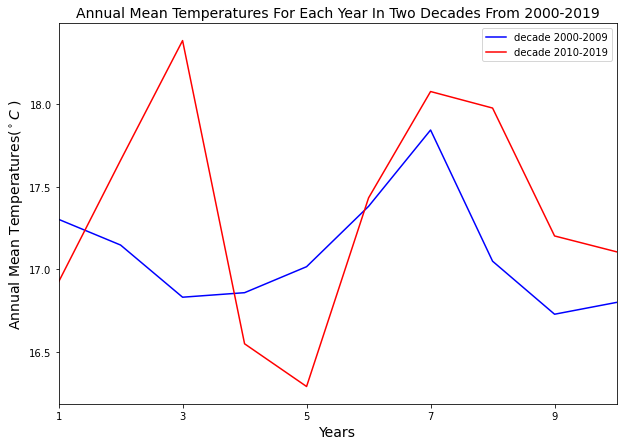

In [ ]:
# Plot of temperatures in the South for the first two decades of the 2nd century
plt.figure(figsize=(10,7)) 

plt.plot(np.arange(len(mean_tempc_south_2000_2009)),mean_tempc_south_2000_2009, '-b', label= "decade 2000-2009")
plt.plot(np.arange(len(mean_tempc_south_2000_2009)),mean_tempc_south_2010_2019, '-r', label= "decade 2010-2019")    
plt.xlabel('Years',size=14) 
plt.ylabel('Annual Mean Temperatures($^\circ C$ )',size=14) # 10 (for years). np.arange(0,10,NUM): 10 / (length of label) = NUM
plt.xticks(np.arange(0,10,2), ['1','3','5','7','9']) # year count in each decade! 10/5 = NUM = 2
plt.autoscale(enable= True, axis= 'x', tight= True)
# plt.xlim([1,10])
# plt.title('Annual Mean Temperatures For Each Year Between 2000-2019',size=14) 
plt.title('Annual Mean Temperatures For Each Year In Two Decades From 2000-2019',size=14) 
plt.legend(loc=0) 
plt.show()


In [ ]:
temp_cty_year_south_decades_2000_2019.describe()


,fips,year,temp,tempc
count,13140.000000,13140.000000,13140.000000,13140.000000
mean,32798.957382,2009.500000,63.009450,17.227472
std,15035.821341,5.766501,4.928796,2.738220
min,5001.000000,2000.000000,50.450000,10.250000
25%,20179.000000,2004.750000,59.575000,15.319444
50%,40005.000000,2009.500000,63.575000,17.541667
75%,48179.000000,2014.250000,66.391667,19.106481
max,48507.000000,2019.000000,77.100000,25.055556


DescribeResult(nobs=6570, minmax=(10.249999999999996, 24.47685185185185), mean=17.09498069225999, variance=7.239510027058863, skewness=-0.12854810434558014, kurtosis=-0.3972446602691253)
DescribeResult(nobs=6570, minmax=(10.347222222222221, 25.055555555555554), mean=17.359963921303347, variance=7.722212514002066, skewness=-0.1925844347039665, kurtosis=-0.38893785050974294)


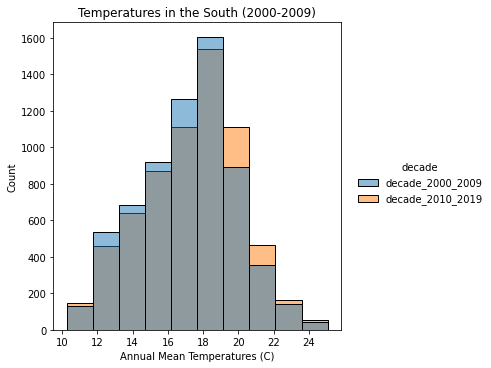

In [ ]:
# Check for normality of the distribution of annual temperatures
# Histogram of annual temperatures in the South for each of the past two decades
ax = sns.displot(temp_cty_year_south_decades_2000_2019, x= 'tempc', hue= 'decade', facet_kws=dict(despine=False), bins = 10)  # stat= 'probability', 
ax.set_axis_labels("Annual Mean Temperatures (C)", "Count"); # Add ';' at the last row to avoid printing the object.
plt.title("Temperatures in the South (2000-2009)");


# Descriptive statistics
print(stats.describe(temp_cty_year_south_decades_2000_2019[temp_cty_year_south_decades_2000_2019['decade'] == 'decade_2000_2009'].tempc))
print(stats.describe(temp_cty_year_south_decades_2000_2019[temp_cty_year_south_decades_2000_2019['decade'] == 'decade_2010_2019'].tempc))



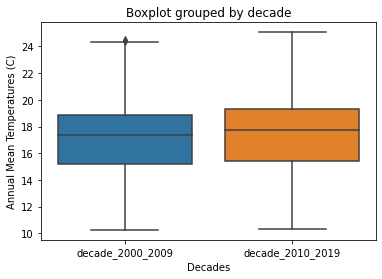

In [ ]:
# Box plot of annual temperatures in the South for each of the past two decades
fx = sns.boxplot(x= 'decade', y='tempc', data= temp_cty_year_south_decades_2000_2019)#, linewidth=2.5) 
fx.set_xlabel("Decades")  
fx.set_ylabel("Annual Mean Temperatures (C)")
fx.set_title("Boxplot grouped by decade"); 



In [ ]:
# Perform t-test for dependent samples
stats.ttest_rel(temp_cty_year_south_decades_2000_2019[temp_cty_year_south_decades_2000_2019['decade'] == 'decade_2000_2009'].tempc,
                temp_cty_year_south_decades_2000_2019[temp_cty_year_south_decades_2000_2019['decade'] == 'decade_2010_2019'].tempc)


Ttest_relResult(statistic=-28.246166281994707, pvalue=9.231437569738768e-166)

In [ ]:
# 95% confidence interval

def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error # could simply use print instead of return given that I am not using the output. commonly though, good to return sthg!
    return ("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" degrees C and "+str(ci_upper)+" degrees C.")

print(get_95_ci(temp_cty_year_south_decades_2000_2019[temp_cty_year_south_decades_2000_2019['decade'] == 'decade_2000_2009'].tempc,
                temp_cty_year_south_decades_2000_2019[temp_cty_year_south_decades_2000_2019['decade'] == 'decade_2010_2019'].tempc)) 

# Average annual temperatures in the South for each decade 2000-2009 and 2010-2019.
print(temp_cty_year_south_decades_2000_2019.loc[temp_cty_year_south_decades_2000_2019['decade'] == 'decade_2000_2009'].tempc.mean(),
      temp_cty_year_south_decades_2000_2019.loc[temp_cty_year_south_decades_2000_2019['decade'] == 'decade_2010_2019'].tempc.mean()) # or np.mean()



The difference in means at the 95% confidence interval (two-tail) is between 0.17145037534741453 degrees C and 0.3585160827393184 degrees C.
17.09498069225998 17.359963921303347


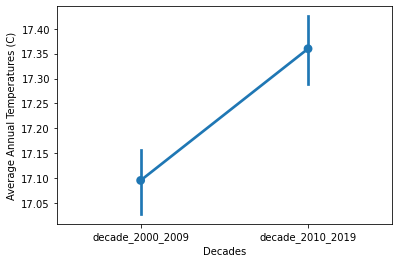

In [ ]:
# Visualize difference in means of annual temperatures in the south between decade 2000-2009 and decade 2010-2019
# sns.set_theme(style="darkgrid")
ax = sns.pointplot(x= 'decade', y= 'tempc', data= temp_cty_year_south_decades_2000_2019)
ax.set_xlabel("Decades")
ax.set_ylabel("Average Annual Temperatures (C)");


# **Results**

Based on the histogram, annual temperatures in the South between 2000-2009 and 2010-2019 are close enough to a normal distribution, which is also suppported by skewness and kurtosis. I therefore performed a t-test and obtained a p-value very close to 0 and less than the target 0.05. Based on this, I can say there is low probability that our results are purely due to random variations in observed temperatures. I can therefore reject the null and say that there are significant differences in means of annual temperatures in the South between the first two decades of this century.

The 95% confidence interval suggests that the the difference in the average annual temperatures in the South between the first two decades of this century is between 0.17 degrees C and 0.36 degrees C. The average annual temperatures for each of those decades is 17.09 degrees C between 2000-2009 and 17.36 degrees C between 2010-2019.

# **Discussion and Recommendation**

The average annual temperatures in the South are higher in 2010-2019 compared to 2000-2009 by about 0.3 degree C (with a range between 0.17 - 0.36 degree C). This is significant and very worrysome. Assuming that the increase is the same for the rest of the century, the South will surely exceed the 2-degree C threshold of the Paris agreement. These results support the need to reduce pollution from human activity in the South, coming from fracking, petro-chemical plants, buildings, ... The public and policymakers need to act now to reduce global warming in the area.

As for the previous hypothesis, a next step to this study would be to gather precipitation data over the past two decades in the South, and investigate whether they correlate with temperatures and support global warming, as rise in average temperatures is expected to increase precipitations in some areas (even though with some time-lag sometimes). It would be interesting to investigate the results of including precipitation data to our study through A/B testing.

Precipitation data are on the website of NOAA (National Oceanic and Atmospheric Administration) and free to access, which will simplify our study.

Potential bias could include errors related to the recording of temperature data at each station. The way the data were corrected (filtered, averaged) could influence the data I am using. I am not sure I could check for such bias given that I do not have the originally recorded data, the ones posted on the NOAA website have already been processed and averaged for the public. If I were to collect new data, I would check the sensitivity of the recording stations and ensure more precision in the recorded data, I could also evaluate if there is not another way to compute annual mean temperatures for each county.
